In [273]:
import pandas as pd

In [274]:
train_features = pd.read_csv('C:\\Users\\sarva\\Downloads\\training_set_features.csv')
train_labels = pd.read_csv('C:\\Users\\sarva\\Downloads\\training_set_labels.csv')
test_features = pd.read_csv('C:\\Users\\sarva\\Downloads\\test_set_features.csv')
#train_features.head()
#train_labels.head()
#test_features.head()

In [275]:
train_data=pd.merge(train_features,train_labels,on='respondent_id')
#train_data.head()

In [276]:
train_data = train_data.drop(['respondent_id'], axis=1)

In [277]:
missing_values = train_data.isnull().sum()
missing_values

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [278]:
train_data['health_insurance'].fillna(1, inplace=True)

In [279]:
train_data.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)

In [280]:
mode_xyz_concern = train_data['xyz_concern'].mode()[0]
train_data['xyz_concern'].fillna(mode_xyz_concern, inplace=True)

In [281]:
mode_xyz_knowledge = train_data['xyz_knowledge'].mode()[0]
train_data['xyz_knowledge'].fillna(mode_xyz_knowledge, inplace=True)

In [282]:
train_data.drop(columns=[ 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'household_adults', 'household_children'], inplace=True)

In [283]:
import matplotlib.pyplot as plt

<Axes: xlabel='seasonal_vaccine', ylabel='count'>

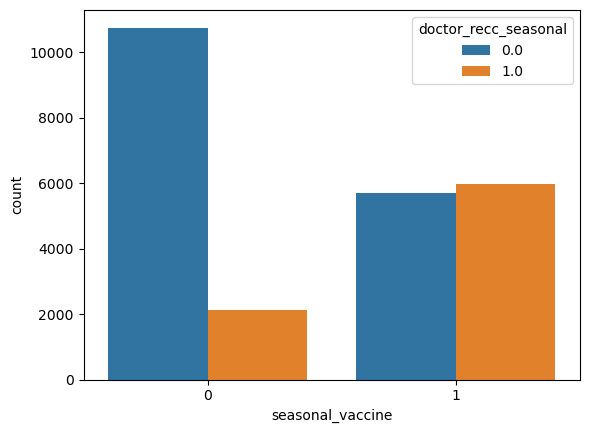

In [284]:
import seaborn as sns
sns.countplot(data=train_data,hue='doctor_recc_seasonal',x='seasonal_vaccine')

In [285]:
train_data.drop(columns=['income_poverty'], inplace=True)

In [286]:
train_data['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [287]:
train_data['employment_status']=train_data['employment_status'].map({'Not in Labor Force':0,'Employed':1,'Unemployed':2})

In [288]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26707 non-null  float64
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [289]:
train_data['age_group']=train_data['age_group'].map({'55 - 64 Years':0,'35 - 44 Years':1,'18 - 34 Years':2,'65+ Years':3,'45 - 54 Years':4})

In [290]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26707 non-null  float64
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [291]:
train_data = train_data.drop(columns=['hhs_geo_region', 'census_msa'])

In [292]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26707 non-null  float64
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [293]:
train_data.shape

(26707, 25)

In [294]:
train_data=train_data.drop(columns=['employment_status'])

In [295]:
train_data.isna().sum()

xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [296]:
value_counts = train_data['behavioral_antiviral_meds'].value_counts()
value_counts

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

In [297]:
train_data['behavioral_antiviral_meds'] = train_data['behavioral_antiviral_meds'].fillna(0)

In [298]:
value_counts1 = train_data['opinion_seas_sick_from_vacc'].value_counts()
value_counts1

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

In [299]:
train_data['behavioral_face_mask'] = train_data['behavioral_face_mask'].fillna(0)

In [300]:
train_data.isna().sum()

xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance            208
behavioral_face_mask              0
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [301]:
value_counts2 = train_data['opinion_seas_sick_from_vacc'].value_counts()
value_counts2

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

In [302]:
value_counts1 = train_data['opinion_seas_sick_from_vacc'].value_counts()
value_counts1

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

In [303]:
X=train_data.drop(columns=['xyz_vaccine','seasonal_vaccine'])

In [304]:
y = train_data[['xyz_vaccine', 'seasonal_vaccine']]

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [307]:
from sklearn.linear_model import LogisticRegression 
#from sklearn.neighbors import KNeighnorClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [308]:
train_data.isna().sum()


xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance            208
behavioral_face_mask              0
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [309]:
train_data=train_data.dropna()

In [310]:
train_data.isna().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
xyz_vaccine                    0
seasonal_vaccine               0
dtype: int64

In [311]:
train_data.shape

(23168, 24)

In [312]:
X=train_data.drop(columns=['xyz_vaccine','seasonal_vaccine','doctor_recc_seasonal','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'])

In [313]:
y = train_data['xyz_vaccine']

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [316]:
from sklearn.linear_model import LogisticRegression 
#from sklearn.neighbors import KNeighnorClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [317]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

svm=svm.SVC()
svm.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rd=RandomForestClassifier()
rd.fit(X_train,y_train)

gd=GradientBoostingClassifier()
gd.fit(X_train,y_train)

GradientBoostingClassifier()

In [318]:
ypredict1=lr.predict(X_test)
ypredict2=svm.predict(X_test)
ypredict3=dt.predict(X_test)
ypredict4=rd.predict(X_test)
ypredict5=gd.predict(X_test)


In [319]:
from sklearn.metrics import accuracy_score

In [320]:
score1=accuracy_score(y_test,ypredict1)
score2=accuracy_score(y_test,ypredict2)
score3=accuracy_score(y_test,ypredict3)
score4=accuracy_score(y_test,ypredict4)
score5=accuracy_score(y_test,ypredict5)


In [321]:
print(score1,score2,score3,score4,score5)

0.8256365990504964 0.8262839879154078 0.7604661199827363 0.8081570996978852 0.8254208027621925


In [322]:
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [323]:

X1=train_data.drop(columns=['xyz_vaccine','seasonal_vaccine','doctor_recc_xyz','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc'])

In [324]:
y1= train_data['seasonal_vaccine']

In [325]:
lr1=LogisticRegression()
lr1.fit(X1,y1)

LogisticRegression()

In [326]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23168 entries, 0 to 26706
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  23168 non-null  float64
 1   xyz_knowledge                23168 non-null  float64
 2   behavioral_antiviral_meds    23168 non-null  float64
 3   behavioral_avoidance         23168 non-null  float64
 4   behavioral_face_mask         23168 non-null  float64
 5   behavioral_wash_hands        23168 non-null  float64
 6   behavioral_large_gatherings  23168 non-null  float64
 7   behavioral_outside_home      23168 non-null  float64
 8   behavioral_touch_face        23168 non-null  float64
 9   doctor_recc_xyz              23168 non-null  float64
 10  doctor_recc_seasonal         23168 non-null  float64
 11  chronic_med_condition        23168 non-null  float64
 12  child_under_6_months         23168 non-null  float64
 13  health_worker   

In [327]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [328]:
test_features=test_features.drop(columns=['employment_occupation','employment_industry','household_children','household_adults','census_msa','hhs_geo_region','employment_status','rent_or_own','marital_status','income_poverty','sex','race','education'])

In [329]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [330]:
test_features['health_insurance'].fillna(1, inplace=True)

In [331]:
mode_xyz_concern = test_features['xyz_concern'].mode()[0]
test_features['xyz_concern'].fillna(mode_xyz_concern, inplace=True)

In [332]:
mode_xyz_knowledge = test_features['xyz_knowledge'].mode()[0]
test_features['xyz_knowledge'].fillna(mode_xyz_knowledge, inplace=True)

In [335]:
test_features['age_group']=test_features['age_group'].map({'55 - 64 Years':0,'35 - 44 Years':1,'18 - 34 Years':2,'65+ Years':3,'45 - 54 Years':4})

In [338]:
test_features['behavioral_antiviral_meds'] = test_features['behavioral_antiviral_meds'].fillna(0)

In [339]:
test_features['behavioral_face_mask'] = test_features['behavioral_face_mask'].fillna(0)

In [340]:
test_features=test_features.dropna()

In [341]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23182 entries, 0 to 26707
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                23182 non-null  int64  
 1   xyz_concern                  23182 non-null  float64
 2   xyz_knowledge                23182 non-null  float64
 3   behavioral_antiviral_meds    23182 non-null  float64
 4   behavioral_avoidance         23182 non-null  float64
 5   behavioral_face_mask         23182 non-null  float64
 6   behavioral_wash_hands        23182 non-null  float64
 7   behavioral_large_gatherings  23182 non-null  float64
 8   behavioral_outside_home      23182 non-null  float64
 9   behavioral_touch_face        23182 non-null  float64
 10  doctor_recc_xyz              23182 non-null  float64
 11  doctor_recc_seasonal         23182 non-null  float64
 12  chronic_med_condition        23182 non-null  float64
 13  child_under_6_mo

In [343]:
X.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'age_group'],
      dtype='object')

In [346]:
df_xyz=test_features[['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'age_group']].copy()

In [348]:
X1.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group'],
      dtype='object')

In [349]:
df_seasonal=test_features[['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group']]

In [359]:
import numpy as np
probabilities_xyz = lr.predict_proba(df_xyz)
yes_class_probabilities =probabilities_xyz[:, 1]
rounded_probabilities = np.round(yes_class_probabilities,2)

In [377]:
probabilities_seasonal = lr1.predict_proba(df_seasonal)
yes_class_probabilities1 = probabilities_seasonal[:, 1]
rounded_probabilities1 = np.round(yes_class_probabilities1,2)

In [378]:
submission=pd.read_csv('C:\\Users\\sarva\\Downloads\\submission_format.csv')

In [379]:
submission['respondent_id']=test_features['respondent_id']

In [380]:
submission['h1n1_vaccine']=rounded_probabilities

In [381]:
submission['seasonal_vaccine']=rounded_probabilities1

In [382]:
submission.to_csv('C:\\Users\\sarva\\Downloads\\submission_format.csv',index=False)